# Interference (H=A+B, H=A+B+C)

In [1]:
## import necessary packages
import numpy as np
from scipy.linalg import expm

from new_bound import sum_second_order_commutator_norm, interference_bound_new, interference_bound_new2
# from trotter import *
# from bounds import *
# from lattice_hamiltonians import interference_bound, tight_bound
# from lattice_hamiltonians import *
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import tight_bound, interference_bound, norm, commutator
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law
from quantum_simulation_recipe.plot_config import *
mpl.rcParams['axes.grid'] = True
cc, lcc = default_color_cycle, [lighten_color(color, 0.3) for color in default_color_cycle]

fig_dir, data_dir = './figs', './data'

In [4]:
from quantum_simulation_recipe.bounds import tight_bound

tfI = Nearest_Neighbour_1d(n=4, Jx=0, Jy=0, Jz=1, hx=2, hy=0, hz=0, pbc=True)
tight_bound(tfI.ham_par, 2, 1, 10, verbose=True)

c1=50.59644256269408, c2=50.59644256269407


0.0632455532033676

## Heisenberg (PF1, XYZ)

In [62]:
from qiskit.quantum_info import random_hermitian

In [97]:
print(np.outer(M_eigvecs[:, 0], M_eigvecs[:, 0].conj()))
print(3*np.outer(M_eigvecs[:, 0], M_eigvecs[:, 0].conj()))

[[ 0.033345+0.000000e+00j -0.165955+6.849764e-02j]
 [-0.165955-6.849764e-02j  0.966655-1.299586e-17j]]
[[ 0.100035+0.000000e+00j -0.497865+2.054929e-01j]
 [-0.497865-2.054929e-01j  2.899965-3.898759e-17j]]


In [155]:
# M = [[1,0], [0,-1]]
n = 6
A = random_hermitian(2**n).to_matrix()
M = A + A.conj().T
M_eigvals, M_eigvecs = np.linalg.eigh(M)[0], np.linalg.eigh(M)[1]
print(M_eigvals)
print(M_eigvecs)
# print('test correctness of eigen: ', norm(M @ M_eigvecs[:, 0] - M_eigvals[0] * M_eigvecs[:, 0], ord=1))
# print('test correctness of eigen: ', norm(np.dot(M, M_eigvecs[:, 1]) - M_eigvals[1] * M_eigvecs[:, 1], ord=1))

dim = 2**n
M_ = np.zeros((dim, dim), dtype=complex)
M_d = M_eigvecs.T.conj() @ M @ M_eigvecs
# print(M_d)
for j in range(dim):
    for k in range(dim):
        v, u = M_eigvecs[:, j], M_eigvecs[:, k]
        # print(f'{j},{k}: {u.T.conj() @ v}')
        # M_ += M_d[j,k] * u @ v.T.conj()
        # M_ += M_d[j,k] * v @ u.T.conj()
        print(f'({j},{k}): {M_d[j,k]}')
        print(np.outer(v, u.conj()))
        M_ += M_d[j,k] * np.outer(v, u.conj())
        # print(v.conj() @ np.outer(v, u.conj()) @ u)
        # print(v @ u.T.conj())
        # print(M_d[j,k])
        # print(M_d[j,k] * v @ u.T.conj())

# for j in range(dim):
#     for k in range(dim):
#         v, u = M_eigvecs[:, j], M_eigvecs[:, k]
#         b_jk = v.T.conj() @ M @ u
#         # print(v.T.conj() @ R_mat @ u * v @ u.T.conj())
#         print('b_jk: ', b_jk)
#         M_ += b_jk * v @ u.T.conj()
# print(M_eigvecs.T.conj() @ M_ @ M_eigvecs)
print('M: \n', M)
print('M_: \n', M_)
print('test correctness of M_: ', norm(M - M_, ord=1))

[-21.100626 -19.952018 -18.614239 -17.269705 -16.780284 -15.812669
 -15.365539 -14.618312 -14.138243 -13.474175 -12.588624 -12.042225
 -11.217091 -10.324414  -9.806562  -9.438201  -8.68506   -8.304532
  -7.717837  -7.047791  -6.252642  -5.669991  -5.441018  -4.727824
  -4.341616  -3.775849  -2.982644  -2.6293    -1.826133  -1.485188
  -1.142883  -0.907974  -0.054224   0.482165   1.26889    1.679916
   2.277761   3.181857   3.728968   4.042716   4.570769   5.070975
   5.707682   6.19989    6.508196   6.964849   7.517222   8.466856
   8.778797   9.808394  10.363298  10.852733  11.872085  12.595266
  12.781809  14.503871  15.458364  15.820881  16.426412  17.294071
  18.38574   19.292244  21.018606  22.457046]
[[-0.038938+0.j        0.118665+0.j       -0.241244+0.j       ...
   0.087345+0.j       -0.079297+0.j        0.144341+0.j      ]
 [-0.222498-0.148916j  0.026615+0.038275j -0.220029+0.13711j  ...
  -0.074892-0.12527j   0.069787-0.004826j  0.110741-0.011711j]
 [ 0.008833+0.265644j -0.0

In [170]:
n = 4
J, h = 1, 0.2 
hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=True)
t, r = n, 100
dt = t / r
H_list = hnn.ham_xyz
print('H_list: ', H_list)   
X, Z = H_list[0], H_list[1]
XZ = commutator(X,Z).simplify()
R = XZ
# L1 = 1/2 * (norm(commutator(X, YZ).simplify())) + 1/6 * (norm(commutator(X,XY).simplify() + commutator(X,XZ).simplify() + commutator(Y,YZ).simplify()))
# L2 = 1/12 * norm(commutator(X, commutator(X,YZ).simplify()).simplify())

R_mat = R.to_matrix()
# init_st = np.linalg.eigh(R_mat)[1][-1]
H_mat = sum(H_list).to_matrix()
# HR_mat = H_mat 
HR_mat = H_mat + R_mat * dt / (2j)
HR_eigvals, HR_eigvecs = np.linalg.eigh(HR_mat)[0], np.linalg.eigh(HR_mat)[1]
H_eigvals, H_eigvecs = np.linalg.eigh(H_mat)[0], np.linalg.eigh(H_mat)[1]
print('test correctness of eigen: ', norm(np.dot(H_mat, H_eigvecs[:, 2]) - H_eigvals[2] * H_eigvecs[:, 2], ord=1))
print('HR_eigvals: ', HR_eigvals)
print('H_eigvals: ', H_eigvals)
print('|HR_eigvals-H_eigvals|: ', norm(HR_eigvals - H_eigvals, ord=1))

eps = 1e-1
dim = 2**n
DR =  np.zeros((dim, dim), dtype=complex)
RR =  np.zeros((dim, dim), dtype=complex)

B = H_eigvecs.T.conj() @ R_mat @ HR_eigvecs
for j in range(dim):
    for k in range(dim):
        v, u = H_eigvecs[:, j], HR_eigvecs[:, k]
        # b_jk = v.T.conj() @ R_mat @ u
        # print(v.T.conj() @ R_mat @ u * v @ u.T.conj())
        # print('b_jk: ', b_jk)
        # RR += b_jk * v @ u.T.conj()
        # RR += B[j,k] * np.outer(v, u.conj())
        if abs(H_eigvals[j] - HR_eigvals[k]) < eps:
            DR += B[j,k] * np.outer(v, u.conj())
        else:
            # print(f'b_{j},{k}: {B[j,k]}')
            # RR += B[j,k] * v @ u.T.conj()
            RR += 1/(H_eigvals[j] - HR_eigvals[k]) * B[j,k] * np.outer(v, u.conj())
# print(RR)
print(f'||Delta(R)||={norm(DR, ord=2)}, ||R(R)||={norm(RR, ord=2)}')
print(norm(commutator(RR, H_mat) + R_mat, ord=2))
# print(norm(RR-R_mat, ord=2), norm(RR, ord=2), norm(R_mat, ord=2))

H_list:  [SparsePauliOp(['IIXX', 'IXXI', 'XXII', 'XIIX', 'IIIX', 'IIXI', 'IXII', 'XIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j]), SparsePauliOp(['IIZZ', 'IZZI', 'ZZII', 'ZIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])]
test correctness of eigen:  8.227350087634376e-15
HR_eigvals:  [-5.667348e+00 -4.039859e+00 -4.000000e+00 -4.000000e-01 -4.000000e-01
 -4.026891e-02 -3.985882e-02 -5.303334e-16  7.169472e-17  6.713914e-16
  3.985882e-02  4.000000e-01  4.000000e-01  3.793261e+00  4.039859e+00
  5.914356e+00]
H_eigvals:  [-5.658286e+00 -4.039608e+00 -4.000000e+00 -4.000000e-01 -4.000000e-01
 -4.039388e-02 -3.960781e-02 -7.430917e-17  1.551194e-16  3.291357e-16
  3.960781e-02  4.000000e-01  4.000000e-01  3.793409e+00  4.039608e+00
  5.905270e+00]
|HR_eigvals-H_eigvals|:  0.01942503910881544
||Delta(R)||=0.45386157668450283, ||R(R)||=3.0828348064865225
0.5208756414733777


## A+B+C

In [195]:
n = 8
J, h = 1, 0.2 
hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=True)
hnn.ham_par
hnn.ham_xyz
# tight_bound(hnn.ham_xyz, 2, 2, 10)
# pf(h_list_par, t, r, order=1)
t, r = n, 100
dt = t / r
H_list = hnn.ham_xyz
X, Y, Z = H_list[0], H_list[1], H_list[2]
XY = commutator(X,Y).simplify()
YZ = commutator(Y,Z).simplify()
XZ = commutator(X,Z).simplify()
R = XY + YZ + XZ
L1 = 1/2 * (norm(commutator(X, YZ).simplify())) + 1/6 * (norm(commutator(X,XY).simplify() + commutator(X,XZ).simplify() + commutator(Y,YZ).simplify()))
L2 = 1/12 * norm(commutator(X, commutator(X,YZ).simplify()).simplify())

R_mat = R.to_matrix()
# init_st = np.linalg.eigh(R_mat)[1][-1]
H_mat = sum(H_list).to_matrix()
# HR_mat = H_mat + R_mat * dt / (2j)
HR_mat = H_mat
HR_eigvals, HR_eigvecs = np.linalg.eigh(HR_mat)[0], np.linalg.eigh(HR_mat)[1]
H_eigvals, H_eigvecs = np.linalg.eigh(H_mat)[0], np.linalg.eigh(H_mat)[1]
print('test correctness of eigen: ', norm(np.dot(H_mat, H_eigvecs[:, 2]) - H_eigvals[2] * H_eigvecs[:, 2], ord=1))
print('HR_eigvals: ', HR_eigvals)
print('H_eigvals: ', H_eigvals)
print('|HR_eigvals-H_eigvals|: ', norm(HR_eigvals - H_eigvals, ord=1))

eps = 1e-3
dim = 2**n
DR =  np.zeros((dim, dim), dtype=complex)
RR =  np.zeros((dim, dim), dtype=complex)

B = H_eigvecs.T.conj() @ R_mat @ HR_eigvecs
for j in range(dim):
    for k in range(dim):
        v, u = HR_eigvecs[:, j], HR_eigvecs[:, k]
        # b_jk = v.T.conj() @ R_mat @ u
        # print('b_jk: ', b_jk)
        if abs(H_eigvals[j] - HR_eigvals[k]) < eps:
            DR += B[j,k] * np.outer(v, u.conj())
        else:
            RR += 1/(H_eigvals[j] - HR_eigvals[k]) * B[j,k] * np.outer(v, u.conj())

print(f'||Delta(R)||={norm(DR, ord=2)}, ||R(R)||={norm(RR, ord=2)}')
norm(commutator(RR, H_mat) + R_mat, ord=2)

test correctness of eigen:  1.15203863869768e-13
HR_eigvals:  [-1.460437e+01 -1.291368e+01 -1.251368e+01 -1.211368e+01 -1.079851e+01
 -1.023495e+01 -1.023495e+01 -9.834954e+00 -9.834954e+00 -9.434954e+00
 -9.434954e+00 -8.980593e+00 -8.980593e+00 -8.580593e+00 -8.580593e+00
 -8.180593e+00 -8.180593e+00 -8.007751e+00 -7.818551e+00 -7.818551e+00
 -7.607751e+00 -7.418551e+00 -7.418551e+00 -7.207751e+00 -7.018551e+00
 -7.018551e+00 -6.828427e+00 -6.828427e+00 -6.807751e+00 -6.472136e+00
 -6.472136e+00 -6.407751e+00 -5.868140e+00 -5.868140e+00 -5.468140e+00
 -5.468140e+00 -5.376491e+00 -5.376491e+00 -5.206559e+00 -5.068140e+00
 -5.068140e+00 -4.976491e+00 -4.976491e+00 -4.806559e+00 -4.668140e+00
 -4.668140e+00 -4.576491e+00 -4.576491e+00 -4.406559e+00 -4.400000e+00
 -4.268140e+00 -4.268140e+00 -4.176491e+00 -4.176491e+00 -4.000000e+00
 -3.835694e+00 -3.835694e+00 -3.776491e+00 -3.776491e+00 -3.600000e+00
 -3.435694e+00 -3.435694e+00 -3.043507e+00 -3.035694e+00 -3.035694e+00
 -2.913514e+00 

2.616428734617564e-13

In [17]:
m1 = np.array([[1, 0], [0, 2]])
v1 = np.array([1, 0])
m1 @ v1

array([1, 0])

### Error VS t

In [22]:
hnn.ham_xyz[0].to_matrix()

array([[0. +0.j, 0.2+0.j, 0.2+0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
       [0.2+0.j, 0. +0.j, 1. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
       [0.2+0.j, 1. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
       ...,
       [0. +0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 1. +0.j, 0.2+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, ..., 1. +0.j, 0. +0.j, 0.2+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, ..., 0.2+0.j, 0.2+0.j, 0. +0.j]])

In [3]:
prefix, suffix = "HNN", "PF1_XYZ" 
n = 8
r = 10000
J, h = 1, 0.2 
t_num = 20 # 50 
t_list = np.logspace(0.5, 2.5, t_num)
# t_list = sorted(list(set(np.logspace(0, 3, 75, dtype=int))))
# print('t_list: ', t_list)
data_t = {key: [] for key in ['r', 'emp_xyz1', 'emp_par1', 'bnd_xyz1', 'bnd_par1', 'emp_xyz2', 'emp_par2', 'bnd_xyz2', 'bnd_par2', 'bnd_our']}

hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=True)
H_list = [term.to_matrix() for term in hnn.ham_xyz]
R = commutator(H_list[0], H_list[1]) + commutator(H_list[0], H_list[2]) + commutator(H_list[1], H_list[2])
R2 = sum_second_order_commutator_norm(H_list)
epsilon = 0.001

for index, t in enumerate(t_list):
    if index % int(len(t_list)/3) == 0: print(index)
    else: print('+', end='')
    # hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=False)
    exact_U = expH(hnn.ham, t)
    # h_list_par = hnn.ham_par
    h_list_par = [term.to_matrix() for term in hnn.ham_par]
    appro_U_par1 = pf(h_list_par, t, r, order=1)
    data_t['emp_par1'].append(norm(exact_U - appro_U_par1, ord=2))
    data_t['bnd_par1'].append(tight_bound(h_list_par, 1, t, r))

    appro_U_par2 = pf(h_list_par, t, r, order=2)
    data_t['emp_par2'].append(norm(exact_U - appro_U_par2, ord=2))
    data_t['bnd_par2'].append(tight_bound(h_list_par, 2, t, r))

    # h_list_xyz = hnn.ham_xyz
    h_list_xyz = [term.to_matrix() for term in hnn.ham_xyz]
    # h_list_xyz_mat = [h.to_matrix() for h in hnn.ham_xyz]
    appro_U_xyz1 = pf(h_list_xyz, t, r, order=1)
    data_t['emp_xyz1'].append(norm(exact_U - appro_U_xyz1, ord=2))
    data_t['bnd_xyz1'].append(min(2, tight_bound(h_list_xyz, 1, t, r)))
    data_t['bnd_our'].append(min(2, interference_bound_new2(R, sum(H_list), t) * t**2/r + R2 * t**3/(r**2)))
    # data_t['bnd_our'].append(min(2, interference_bound_new(R, sum(H_list), t, epsilon) * epsilon * t**2/r + R2 * t**3/(r**2)))


0
+++++6
+++++12
+++++18
+

Slope (a): 0.9866629762734124 ; Intercept (b): -7.622947635751827
Slope (a): 2.871139041091989 ; Intercept (b): -14.931724167200832
Slope (a): 1.9999999999999998 ; Intercept (b): -6.231654038680852
title: <<PF1, TFI (J=1, h=0.2), r=10000>>


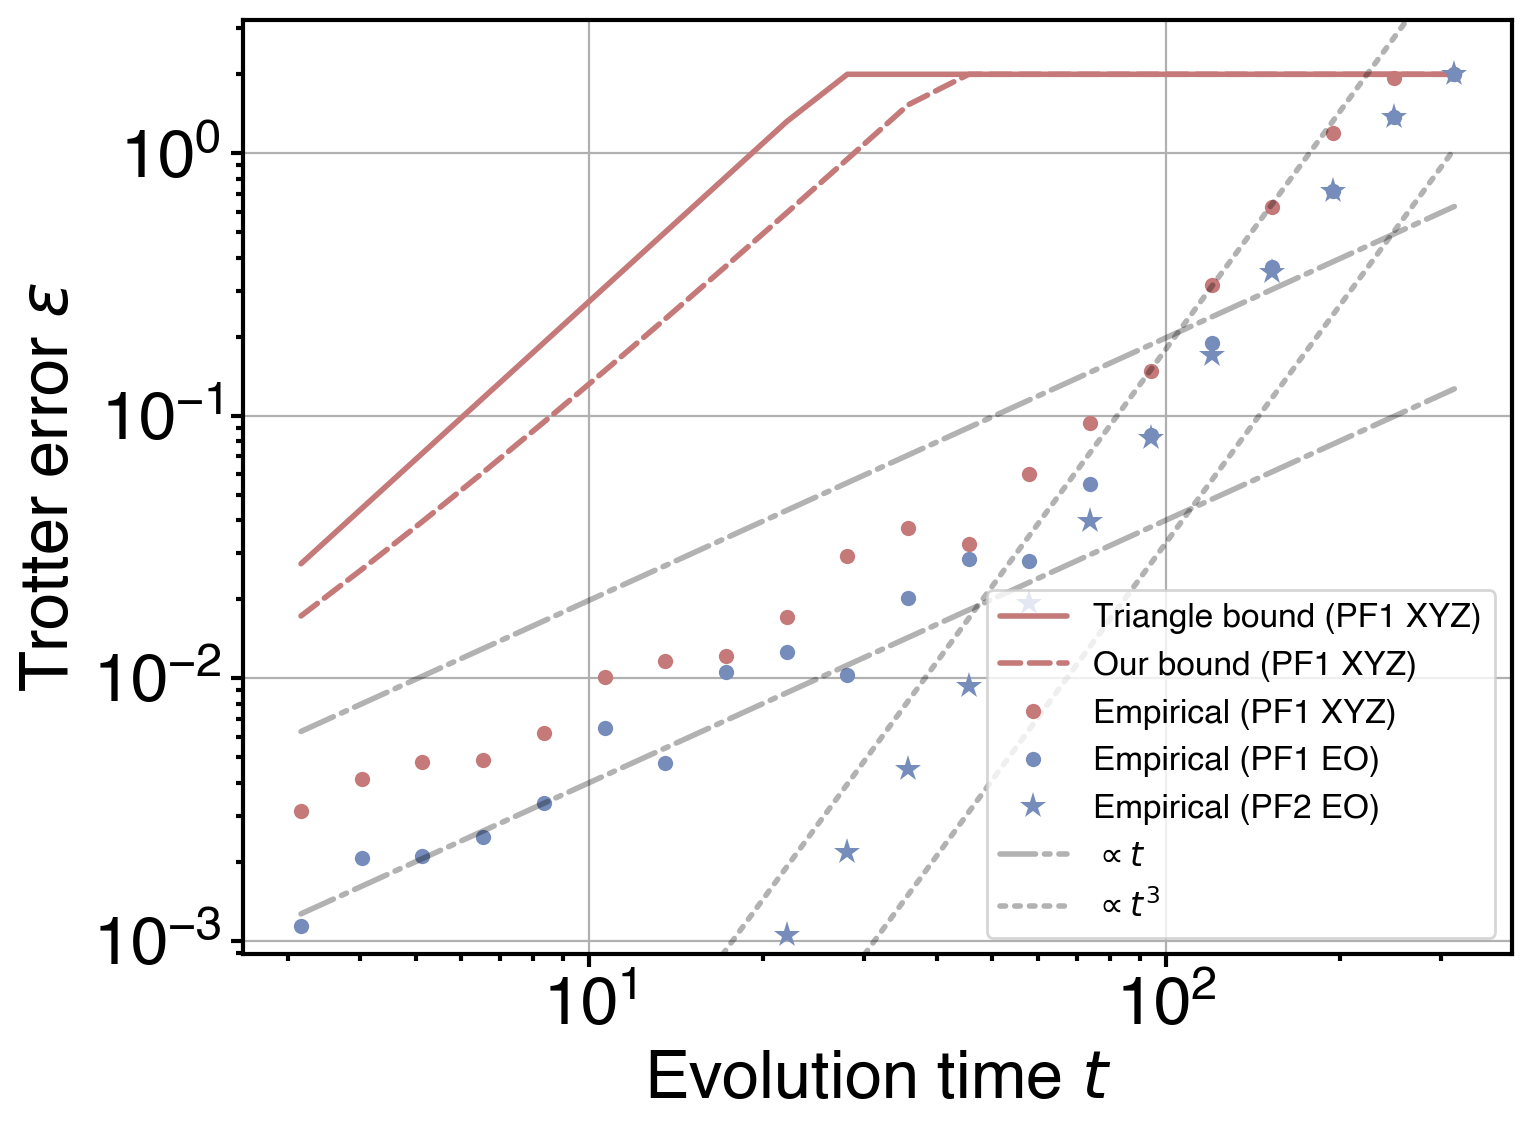

In [4]:
# plt.rc('font', size=MEDIUM_SIZE+0)  # controls default text sizes
cc, lcc = default_color_cycle, [lighten_color(color, 0.1) for color in default_color_cycle]
set_color_cycle(default_color_cycle, 0.2)
plt.rc('legend', fontsize=MEDIUM_SIZE-6) 
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['axes.grid'] = True

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

start1, end1 = int(2*len(t_list)/10), int(5*len(t_list)/10)
start2, end2 = int(7*len(t_list)/10), int(9*len(t_list)/10)
_, a_1, b_1 = linear_loglog_fit(t_list[start1:end1], data_t['emp_par1'][start1:end1], verbose=True)
_, a_2, b_2 = linear_loglog_fit(t_list[start2:end2], data_t['emp_xyz1'][start2:end2], verbose=True)
_, a_bnd, b_bnd = linear_loglog_fit(t_list, data_t['bnd_par1'], verbose=True)

# ax.plot(t_list, data_t['bnd_par1'], '--', label='Bound (EO)', markeredgewidth=0.0, c='#C87A8AFF')
ax.plot(t_list, data_t['bnd_xyz1'], '-', label='Triangle bound (PF1 XYZ)', markeredgewidth=0.0, c=lcc[0]) 
ax.plot(t_list, data_t['bnd_our'], '--', label='Our bound (PF1 XYZ)', markeredgewidth=0.0, c=lcc[0]) 
ax.plot(t_list, data_t['emp_xyz1'], '.', label='Empirical (PF1 XYZ)', markeredgewidth=0.0, mfc=lcc[0])
ax.plot(t_list, data_t['emp_par1'], '.', label='Empirical (PF1 EO)', markeredgewidth=0.0, mfc=lcc[1])
ax.plot(t_list, data_t['emp_par2'], '*', label='Empirical (PF2 EO)', markeredgewidth=0.0, mfc=lcc[1], markersize=10)
ax.plot(t_list, [t*exp(b_1+1.4) for t in t_list], 'k-.', linewidth=2, alpha=0.3, label=fr'$\propto t$')
ax.plot(t_list, [t*exp(b_1-0.2) for t in t_list], 'k-.', linewidth=2, alpha=0.3)
# ax.plot(t_list, [t**2*exp(b_bnd+1) for t in t_list], 'k--', linewidth=2, alpha=0.3, label=fr'$\propto t^2$')
# ax.plot(t_list, [t**2*exp(b_bnd-1) for t in t_list], 'k--', linewidth=2, alpha=0.3)
ax.plot(t_list, [t**3*exp(b_2-0.6) for t in t_list], 'k:', linewidth=2, alpha=0.3, label=fr'$\propto t^3$')
ax.plot(t_list, [t**3*exp(b_2-2.3) for t in t_list], 'k:', linewidth=2, alpha=0.3)
ax_set_text(ax, r'Evolution time $t$', r'Trotter error $\epsilon$', log='xy', ylim=[min(data_t['emp_xyz1'])/3, max(data_t['emp_xyz1'])*1.4], legend='best')
title = f'PF1, TFI (J={J}, h={h}), r={r}'
print(f'title: <<{title}>>')
# ax.set_title(title) # ax.set_ylim([1e-4, 1e-0])
fig.savefig(f'{fig_dir}/{prefix}_errVSt_n={n}_r={r}_eps={epsilon}_{suffix}.pdf')

### Error VS r

In [18]:
prefix, suffix = 'HNN', 'PF1'
n, t = 8, 20
J, h = 1, 0.2
r_list = sorted(list(set(np.logspace(2, 5, 30, dtype=int))))
# r_list = np.logspace(1, 1.5, 20, dtype=int)
print('r_list: ', r_list)
data_r = {key: [] for key in ['r', 'emp_xyz1', 'emp_eo1', 'bnd_xyz1', 'bnd_eo1', 'emp_xyz2', 'emp_eo2', 'bnd_xyz2', 'bnd_eo2', 'interf']}

for r in r_list:
    hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=True)
    # tfI = TF_Ising_1d(n, J, h)
    exact_U = expm(-1j * t * hnn.ham.to_matrix())
    appro_U_xyz1 = pf_r([h.to_matrix(True) for h in hnn.ham_xyz], t, r, order=1)
    appro_U_xyz2 = pf_r([h.to_matrix(True) for h in hnn.ham_xyz], t, r, order=2)
    appro_U_eo1 = pf_r([h.to_matrix(True) for h in hnn.ham_par], t, r, order=1)
    appro_U_eo2 = pf_r([h.to_matrix(True) for h in hnn.ham_par], t, r, order=2)
    data_r['emp_xyz1'].append(norm(exact_U - appro_U_xyz1, ord=2))
    data_r['emp_xyz2'].append(norm(exact_U - appro_U_xyz2, ord=2))
    data_r['emp_eo1'].append(norm(exact_U - appro_U_eo1, ord=2))
    data_r['emp_eo2'].append(norm(exact_U - appro_U_eo2, ord=2))
    data_r['bnd_xyz2'].append(tight_bound([term.to_matrix() for term in hnn.ham_xyz], 2, t, r))
    data_r['bnd_eo2'].append(tight_bound([term.to_matrix() for term in hnn.ham_par], 2, t, r))
    data_r['bnd_eo1'].append(tight_bound([term.to_matrix() for term in hnn.ham_par], 1, t, r))
    data_r['interf'].append(interference_bound([term.to_matrix() for term in hnn.ham_par], t, r))

r_list:  [100, 126, 161, 204, 259, 329, 417, 529, 672, 853, 1082, 1373, 1743, 2212, 2807, 3562, 4520, 5736, 7278, 9236, 11721, 14873, 18873, 23950, 30391, 38566, 48939, 62101, 78804, 100000]


NameError: name 'pf_r' is not defined

In [20]:
prefix, suffix = 'HNN', 'PF1'
n, t = 8, 20
J, h = 1, 0.2
r_list = sorted(list(set(np.logspace(2, 5, 30, dtype=int))))
# r_list = np.logspace(1, 1.5, 20, dtype=int)
print('r_list: ', r_list)
data_r = {key: [] for key in ['r', 'emp_xyz1', 'emp_eo1', 'bnd_xyz1', 'bnd_eo1', 'emp_xyz2', 'emp_eo2', 'bnd_xyz2', 'bnd_eo2', 'interf']}

hnn = Nearest_Neighbour_1d(n=n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=True)
# tfI = TF_Ising_1d(n, J, h)
exact_U = expm(-1j * t * hnn.ham.to_matrix())
for r in r_list:
    appro_U_xyz1 = pf(hnn.ham_xyz, t, r, order=1)
    appro_U_xyz2 = pf(hnn.ham_xyz, t, r, order=2)
    appro_U_eo1  = pf(hnn.ham_par, t, r, order=1)
    appro_U_eo2  = pf(hnn.ham_par, t, r, order=2)
    data_r['emp_xyz1'].append(norm(exact_U - appro_U_xyz1, ord=2))
    data_r['emp_xyz2'].append(norm(exact_U - appro_U_xyz2, ord=2))
    data_r['emp_eo1'].append(norm(exact_U - appro_U_eo1, ord=2))
    data_r['emp_eo2'].append(norm(exact_U - appro_U_eo2, ord=2))
    data_r['bnd_xyz2'].append(tight_bound([term.to_matrix() for term in hnn.ham_xyz], 2, t, r))
    data_r['bnd_eo2'].append(tight_bound([term.to_matrix() for term in hnn.ham_par], 2, t, r))
    data_r['bnd_eo1'].append(tight_bound([term.to_matrix() for term in hnn.ham_par], 1, t, r))
    data_r['interf'].append(interference_bound([term.to_matrix() for term in hnn.ham_par], t, r))

r_list:  [100, 126, 161, 204, 259, 329, 417, 529, 672, 853, 1082, 1373, 1743, 2212, 2807, 3562, 4520, 5736, 7278, 9236, 11721, 14873, 18873, 23950, 30391, 38566, 48939, 62101, 78804, 100000]


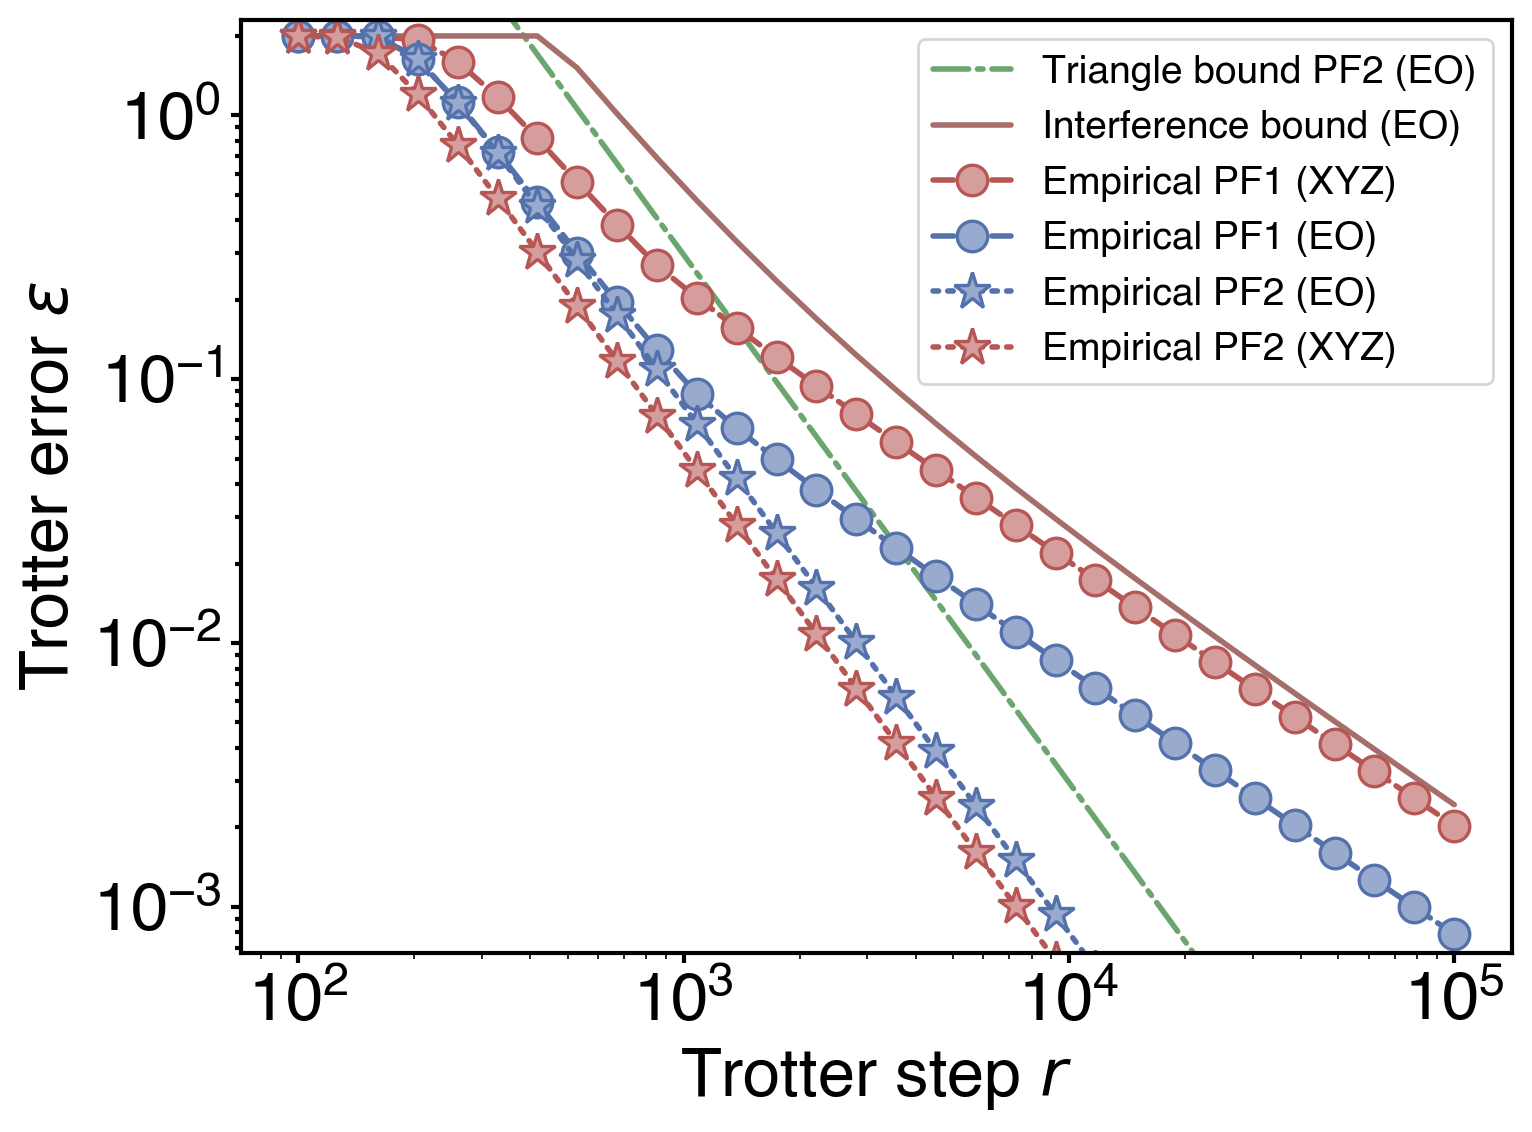

In [21]:
set_color_cycle(cc, 0.3)
mpl.rcParams['lines.markeredgewidth'] = 1.2
plt.rc('legend', fontsize=MEDIUM_SIZE-4)  
fig, ax = plt.subplots(1, 1)
# plot_fit(ax, r_list, data['bnd_eo2'], var='r', y_offset=1.45, x_offset=0.84, linewidth=0.01)
# ax.plot(r_list, data['bnd_eo1'], '-.', label='Triangle bound PF1 (EO)')
ax.plot(r_list, data_r['bnd_eo2'], '-.', label='Triangle bound PF2 (EO)', color=cc[2])
ax.plot(r_list, np.array(data_r['interf'])[:, 0], '-', label='Interference bound (EO)', color=cc[3])
# ax.plot(r_list, data_r['bnd_xz2'], '--', label='Triangle bound (XZ)')
# ax.plot(r_list, data_r['emp_eo1'], 'o-', label='Empirical PF1 (EO)')
ax.plot(r_list, data_r['emp_xyz1'], 'o--', label='Empirical PF1 (XYZ)', mfc=lcc[0], markeredgecolor=cc[0], color=cc[0])
ax.plot(r_list, data_r['emp_eo1'], 'o--', label='Empirical PF1 (EO)', mfc=lcc[1], markeredgecolor=cc[1], color=cc[1])
ax.plot(r_list, data_r['emp_eo2'], '*:', label='Empirical PF2 (EO)', mfc=lcc[1], markeredgecolor=cc[1], color=cc[1], markersize=14)
ax.plot(r_list, data_r['emp_xyz2'], '*:', label='Empirical PF2 (XYZ)', mfc=lcc[0], markeredgecolor=cc[0], color=cc[0], markersize=14)
ax_set_text(ax, r'Trotter step $r$', r'Trotter error $\epsilon$', log='xy', ylim=[min(data_r['emp_eo1']), max(data_r['emp_eo1'])])
fig.savefig(f'{fig_dir}/{prefix}_errVSr_n={n}_t={t}_{suffix}.pdf')

In [ ]:
bound = interf_bound[:, 0]
e1 = interf_bound[:, 1]
e2 = interf_bound[:, 2]
e3 = interf_bound[:, 3]
data_plot(t_list, bound, '-', linewidth=1.4, label=r'Interference bound (L=2)')
data_plot(t_list, e1, ':', alpha=0.7, label=r'Bound: $\min(||H_0||,||H_1||)\, t/r$', linewidth=1) # C_1
data_plot(t_list, e2, '--', alpha=0.7, label=r'Bound: $\frac{1}{2}||[H_0,H_1]||\, t^2/r$', linewidth=1) # C_2